In [546]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import StandardScaler

In [547]:
bank = pd.read_csv("E:\DataScience\Assignments\Logistics Regression/bank-full.csv", sep=";")

In [548]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [549]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [550]:
dummy = pd.get_dummies(bank.iloc[:,0:16])
bank1=bank.iloc[:,16]
bank=pd.concat([bank1,dummy],axis=1)

In [551]:
bank['y'] = bank['y'].replace(['yes'], '1')

In [552]:
bank['y'] = bank['y'].replace(['no'], '0')

In [553]:
bank

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,2143,5,261,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,44,29,5,151,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,33,2,5,76,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,47,1506,5,92,1,-1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,33,1,5,198,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,825,17,977,3,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,1,71,1729,17,456,2,-1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,1,72,5715,17,1127,5,184,3,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,57,668,17,508,4,-1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [554]:
bank.shape

(45211, 52)

In [555]:
x=bank.iloc[:,1:]
y=bank.iloc[:,0]

In [556]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [557]:
scaler = StandardScaler()

In [558]:
scaler.fit(x)

StandardScaler()

In [559]:
x_transform = scaler.transform(x)

In [560]:
x_transform

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.22802402,  0.14341818, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857,  0.52836436,  0.14341818, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [561]:
x = pd.DataFrame(x_transform, columns=x.columns[:])

In [562]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,-0.359369,-0.523740,5.422561,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,-0.359369,1.909346,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,-0.359369,-0.523740,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.348687,-0.205972,5.377848,-2.116316
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,-0.359369,1.909346,-0.184415,...,-0.366006,-0.103262,-0.661650,3.223067,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519


In [563]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object

In [564]:
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [565]:
y_pred = classifier.predict(x)

In [566]:
df = pd.DataFrame({'actual':y,
                  'predicted_prob': classifier.predict(x)})

In [567]:
df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [568]:
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[38941   981]
 [ 3457  1832]]


In [569]:
((38941+1832)/(38941+981+3457+1832))*100

90.18380482625909

In [570]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     39922
           1       0.65      0.35      0.45      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.66      0.70     45211
weighted avg       0.89      0.90      0.89     45211



In [571]:
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1], pos_label=2)
auc = roc_auc_score(y, y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


Text(0, 0.5, 'True Positive Rate')

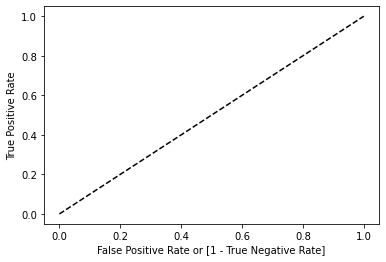

In [572]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')